## Importing liabraries

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [ ]:
dataset = pd.read_csv("/Complete dataset.csv")[0:4000]

In [ ]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,567885401714589696,negative,1.0000,Lost Luggage,1.0000,United,NaN,NursesLeading,NaN,0,@united I am a frequent user. Congrats u only ...,NaN,2015-02-17 19:16:45 -0800,NaN,NaN
3996,567884863031762945,positive,1.0000,NaN,NaN,United,NaN,jmscull,NaN,0,@united Sivi Stewart at Lax was fantastic toni...,NaN,2015-02-17 19:14:36 -0800,NaN,NaN
3997,567884646270267392,negative,1.0000,Lost Luggage,1.0000,United,NaN,mbbaker78,NaN,0,"@united Yes, though they have not located the ...","[40.84018945, -73.93737649]",2015-02-17 19:13:45 -0800,"New York, NY",NaN
3998,567883674462588929,positive,1.0000,NaN,NaN,United,NaN,JCVersi,NaN,0,@united Got me home amid snow &amp; Cancelled ...,NaN,2015-02-17 19:09:53 -0800,Washington DC,London


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      4000 non-null   int64  
 1   airline_sentiment             4000 non-null   object 
 2   airline_sentiment_confidence  4000 non-null   float64
 3   negativereason                2596 non-null   object 
 4   negativereason_confidence     2973 non-null   float64
 5   airline                       4000 non-null   object 
 6   airline_sentiment_gold        7 non-null      object 
 7   name                          4000 non-null   object 
 8   negativereason_gold           6 non-null      object 
 9   retweet_count                 4000 non-null   int64  
 10  text                          4000 non-null   object 
 11  tweet_coord                   345 non-null    object 
 12  tweet_created                 4000 non-null   object 
 13  twe

In [ ]:
text = dataset['text'].values
text

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@united Yes, though they have not located the bag yet. It was a lovely flight outside of that.',
       '@united Got me home amid snow &amp; Cancelled Flightlations; delivered bag w/o hassle; plus no wait on phone &amp; an upgrade. Thank you!',
       '@united My wife has been on the phone several times for past 3 days, with no result.'],
      dtype=object)

In [ ]:
text=[word_tokenize(doc) for doc in text]
sentiment=dataset['airline_sentiment'].values

In [ ]:
sentiment

array(['neutral', 'positive', 'neutral', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [ ]:
document = [(text[i], sentiment[i]) for i in range(4000)]

In [ ]:
document[0]

(['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'], 'neutral')

## Cleanining of data

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.corpus import wordnet

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return words.ADJ
    else:
        return wordnet.NOUN


In [ ]:
import string
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)


In [ ]:
def clean_review(words):
  output_words = []
  for w in words:
    if w.lower() not in stops:
      pos = pos_tag([w])
      clean_word = lemmatizer.lemmatizer(w, pos = get_simple_pos(pos[0] [1]))
      output_words.append(clean_word.lower())
      return output_words

In [ ]:
document = [(clean_review(doc), category) for doc, category in document]


AttributeError: ignored

In [ ]:
for i in document:
  print(i)

(['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'], 'neutral')
(['@', 'VirginAmerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.'], 'positive')
(['@', 'VirginAmerica', 'I', 'did', "n't", 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!'], 'neutral')
(['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse'], 'negative')
(['@', 'VirginAmerica', 'and', 'it', "'s", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it'], 'negative')
(['@', 'VirginAmerica', 'seriously', 'would', 'pay', '$', '30', 'a', 'flight', 'for', 'seats', 'that', 'did', "n't", 'have', 'this', 'playing', '.', 'it', "'s", 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA'], 'negative')
(['@', 'VirginAmerica', 'yes', ',', 'nearly', 'every', 'time', 'I', 'fly', 'VX', 'thi

In [ ]:
categories = [category for document, category in document]
categories

['neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'ne

In [ ]:
text_document = [" ".join(document) for document, category in document]
text_document

['@ VirginAmerica What @ dhepburn said .',
 "@ VirginAmerica plus you 've added commercials to the experience ... tacky .",
 "@ VirginAmerica I did n't today ... Must mean I need to take another trip !",
 "@ VirginAmerica it 's really aggressive to blast obnoxious `` entertainment '' in your guests ' faces & amp ; they have little recourse",
 "@ VirginAmerica and it 's a really big bad thing about it",
 "@ VirginAmerica seriously would pay $ 30 a flight for seats that did n't have this playing . it 's really the only bad thing about flying VA",
 '@ VirginAmerica yes , nearly every time I fly VX this “ ear worm ” won ’ t go away : )',
 '@ VirginAmerica Really missed a prime opportunity for Men Without Hats parody , there . https : //t.co/mWpG7grEZP',
 "@ virginamerica Well , I didn't…but NOW I DO ! : -D",
 "@ VirginAmerica it was amazing , and arrived an hour early . You 're too good to me .",
 '@ VirginAmerica did you know that suicide is the second leading cause of death among teens 1

In [ ]:
# Define X and Y
X = dataset['text']  # input data or features
Y = dataset['airline_sentiment']  # output or target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
count_vect = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
X_train_features = count_vect.fit_transform(X_train)
X_test_features = count_vect.transform(X_test)


In [ ]:
X_train_features

<3200x1397 sparse matrix of type '<class 'numpy.float64'>'
	with 42525 stored elements in Compressed Sparse Row format>

## SVM Classifier

In [ ]:
clf = SVC()
clf.fit(X_train_features,y_train)
y_pred1 = clf.predict(X_test_features)

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

    negative       0.75      0.97      0.84       515
     neutral       0.57      0.24      0.34       166
    positive       0.81      0.44      0.57       119

    accuracy                           0.74       800
   macro avg       0.71      0.55      0.58       800
weighted avg       0.72      0.74      0.70       800



<Axes: >

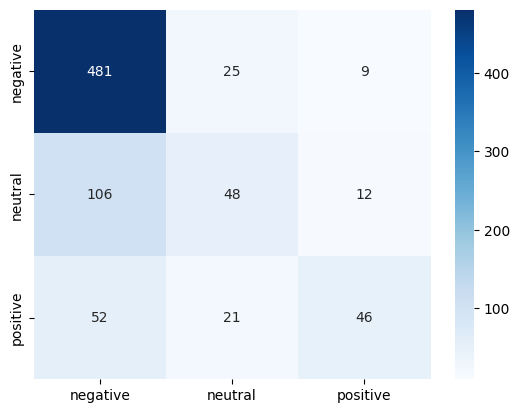

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the confusion matrix for the model predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])


## Random forest

In [ ]:
# Train the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_features, y_train)

# Test the classifier
y_pred1 = rfc.predict(X_test_features)

# Evaluate the performance
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.75      0.93      0.83       515
     neutral       0.51      0.29      0.37       166
    positive       0.69      0.39      0.49       119

    accuracy                           0.72       800
   macro avg       0.65      0.54      0.57       800
weighted avg       0.69      0.72      0.69       800



In [ ]:
## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_features, y_train)

# Test the classifier
y_pred1 = logreg.predict(X_test_features)

# Evaluate the performance
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.77      0.96      0.85       515
     neutral       0.59      0.31      0.41       166
    positive       0.77      0.45      0.56       119

    accuracy                           0.75       800
   macro avg       0.71      0.57      0.61       800
weighted avg       0.73      0.75      0.72       800



## Naive byas


In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train_features, y_train)

# Test the classifier
y_pred1 = naive.predict(X_test_features)

# Evaluate the performance
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.70      0.99      0.82       515
     neutral       0.62      0.13      0.21       166
    positive       0.82      0.23      0.36       119

    accuracy                           0.70       800
   macro avg       0.71      0.45      0.46       800
weighted avg       0.70      0.70      0.62       800



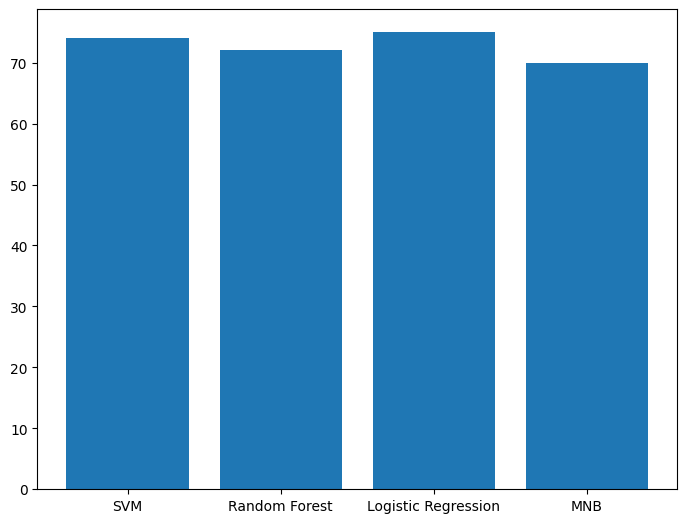

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['SVM', 'Random Forest', 'Logistic Regression', 'MNB']
students = [74,72,75,70]
ax.bar(langs,students)
plt.show()